In [1]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.activations import relu
from dataclasses import dataclass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

2023-08-30 11:36:11.392775: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-30 11:36:11.415968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 11:36:11.783969: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1]*train_images.shape[1]))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1]*test_images.shape[1]))

train_images_norm = StandardScaler().fit_transform(train_images.T).T
test_images_norm = StandardScaler().fit_transform(test_images.T).T

X_train = train_images_norm.reshape(train_images_norm.shape[0], 28, 28)
X_test = test_images_norm.reshape(test_images_norm.shape[0], 28, 28)

In [3]:
#
# --- PCA ---
#
from numpy.linalg import eigh

def pca(X, n=None):
    if not n : n = X.shape[1]
    X = StandardScaler().fit_transform(X.T).T
    corr_matrix = X.T @ X
    w, v = eigh(corr_matrix)
    weights = v[:, -n:].T @ X.T
    return weights.T @ v[:, -n:].T

5 components


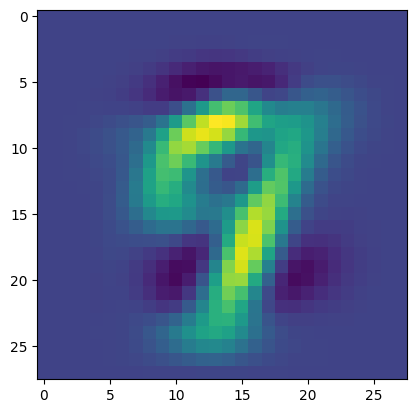

20 components


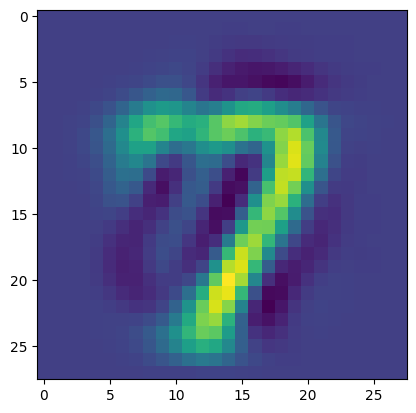

50 components


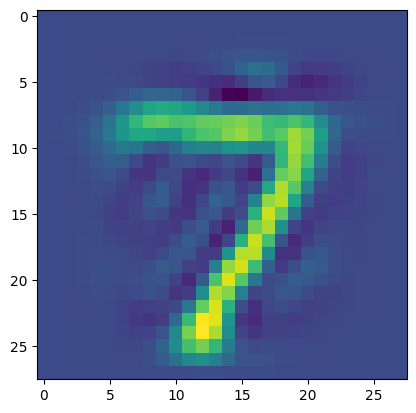

200 components


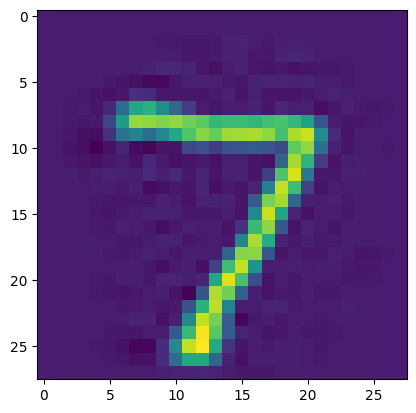

original image


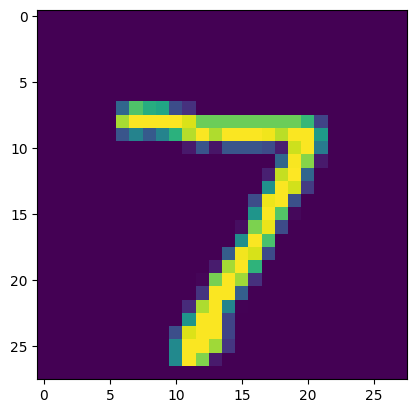

In [4]:
for i in [5, 20, 50, 200]:
    print(f"{i} components")
    plt.imshow(pca(test_images_norm, i)[0].reshape(28, 28))
    plt.show()

print(f"original image")
plt.imshow(test_images_norm[0].reshape(28, 28))
plt.show()